In [ ]:
!pip install pydub

from pydub import AudioSegment
from pydub.playback import play
import librosa
import torchaudio
import torchaudio.transforms as T
import torch
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
STUTTER = '/content/drive/Othercomputers/Mi portátil/projecte/StutterFormer/data/LibriStutter/LibriStutter Audio/289/121665/289-121665-0033.flac'
SPEECH = '/content/drive/Othercomputers/Mi portátil/projecte/StutterFormer/data/LibriSpeech/289/121665/289-121665-0033.flac'

In [ ]:
sound1 = AudioSegment.from_file(STUTTER)
sound2 = AudioSegment.from_file(SPEECH)


combined = sound1.overlay(sound2)

In [ ]:
combined

In [ ]:
%%capture
!pip install speechbrain
!pip install pesq
!pip install mir_eval
%%capture
import speechbrain
import torch

In [ ]:
from speechbrain.pretrained import SepformerSeparation as separator
import torchaudio
import IPython.display as ipd

#FILE = 'speechbrain/sepformer-wham16k-enhancement/example_wham16k.wav'
FILE = '1334-135589-0029.flac'

model1 = separator.from_hparams(source="speechbrain/sepformer-wham16k-enhancement", savedir='pretrained_models/sepformer-wham16k-enhancement')
model2 = separator.from_hparams(source="speechbrain/sepformer-wham-enhancement", savedir='pretrained_models/sepformer-wham-enhancement')
model3 = separator.from_hparams(source="speechbrain/sepformer-whamr-enhancement", savedir='pretrained_models/sepformer-whamr-enhancement')

sources1 = model1.separate_file(path=FILE)
sources2 = model2.separate_file(path=FILE)
sources3 = model3.separate_file(path=FILE)

ipd.Audio("1334-135589-0029.flac", rate=16000)

Resampling the audio from 22050 Hz to 16000 Hz
Resampling the audio from 22050 Hz to 8000 Hz
Resampling the audio from 22050 Hz to 8000 Hz


In [ ]:
ipd.Audio(sources1[:, :, 0], rate=16000)

In [ ]:
ipd.Audio(sources2[:, :, 0], rate=8000)

In [ ]:
ipd.Audio(sources3[:, :, 0], rate=8000)

# 2.2

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<Figure size 432x288 with 0 Axes>

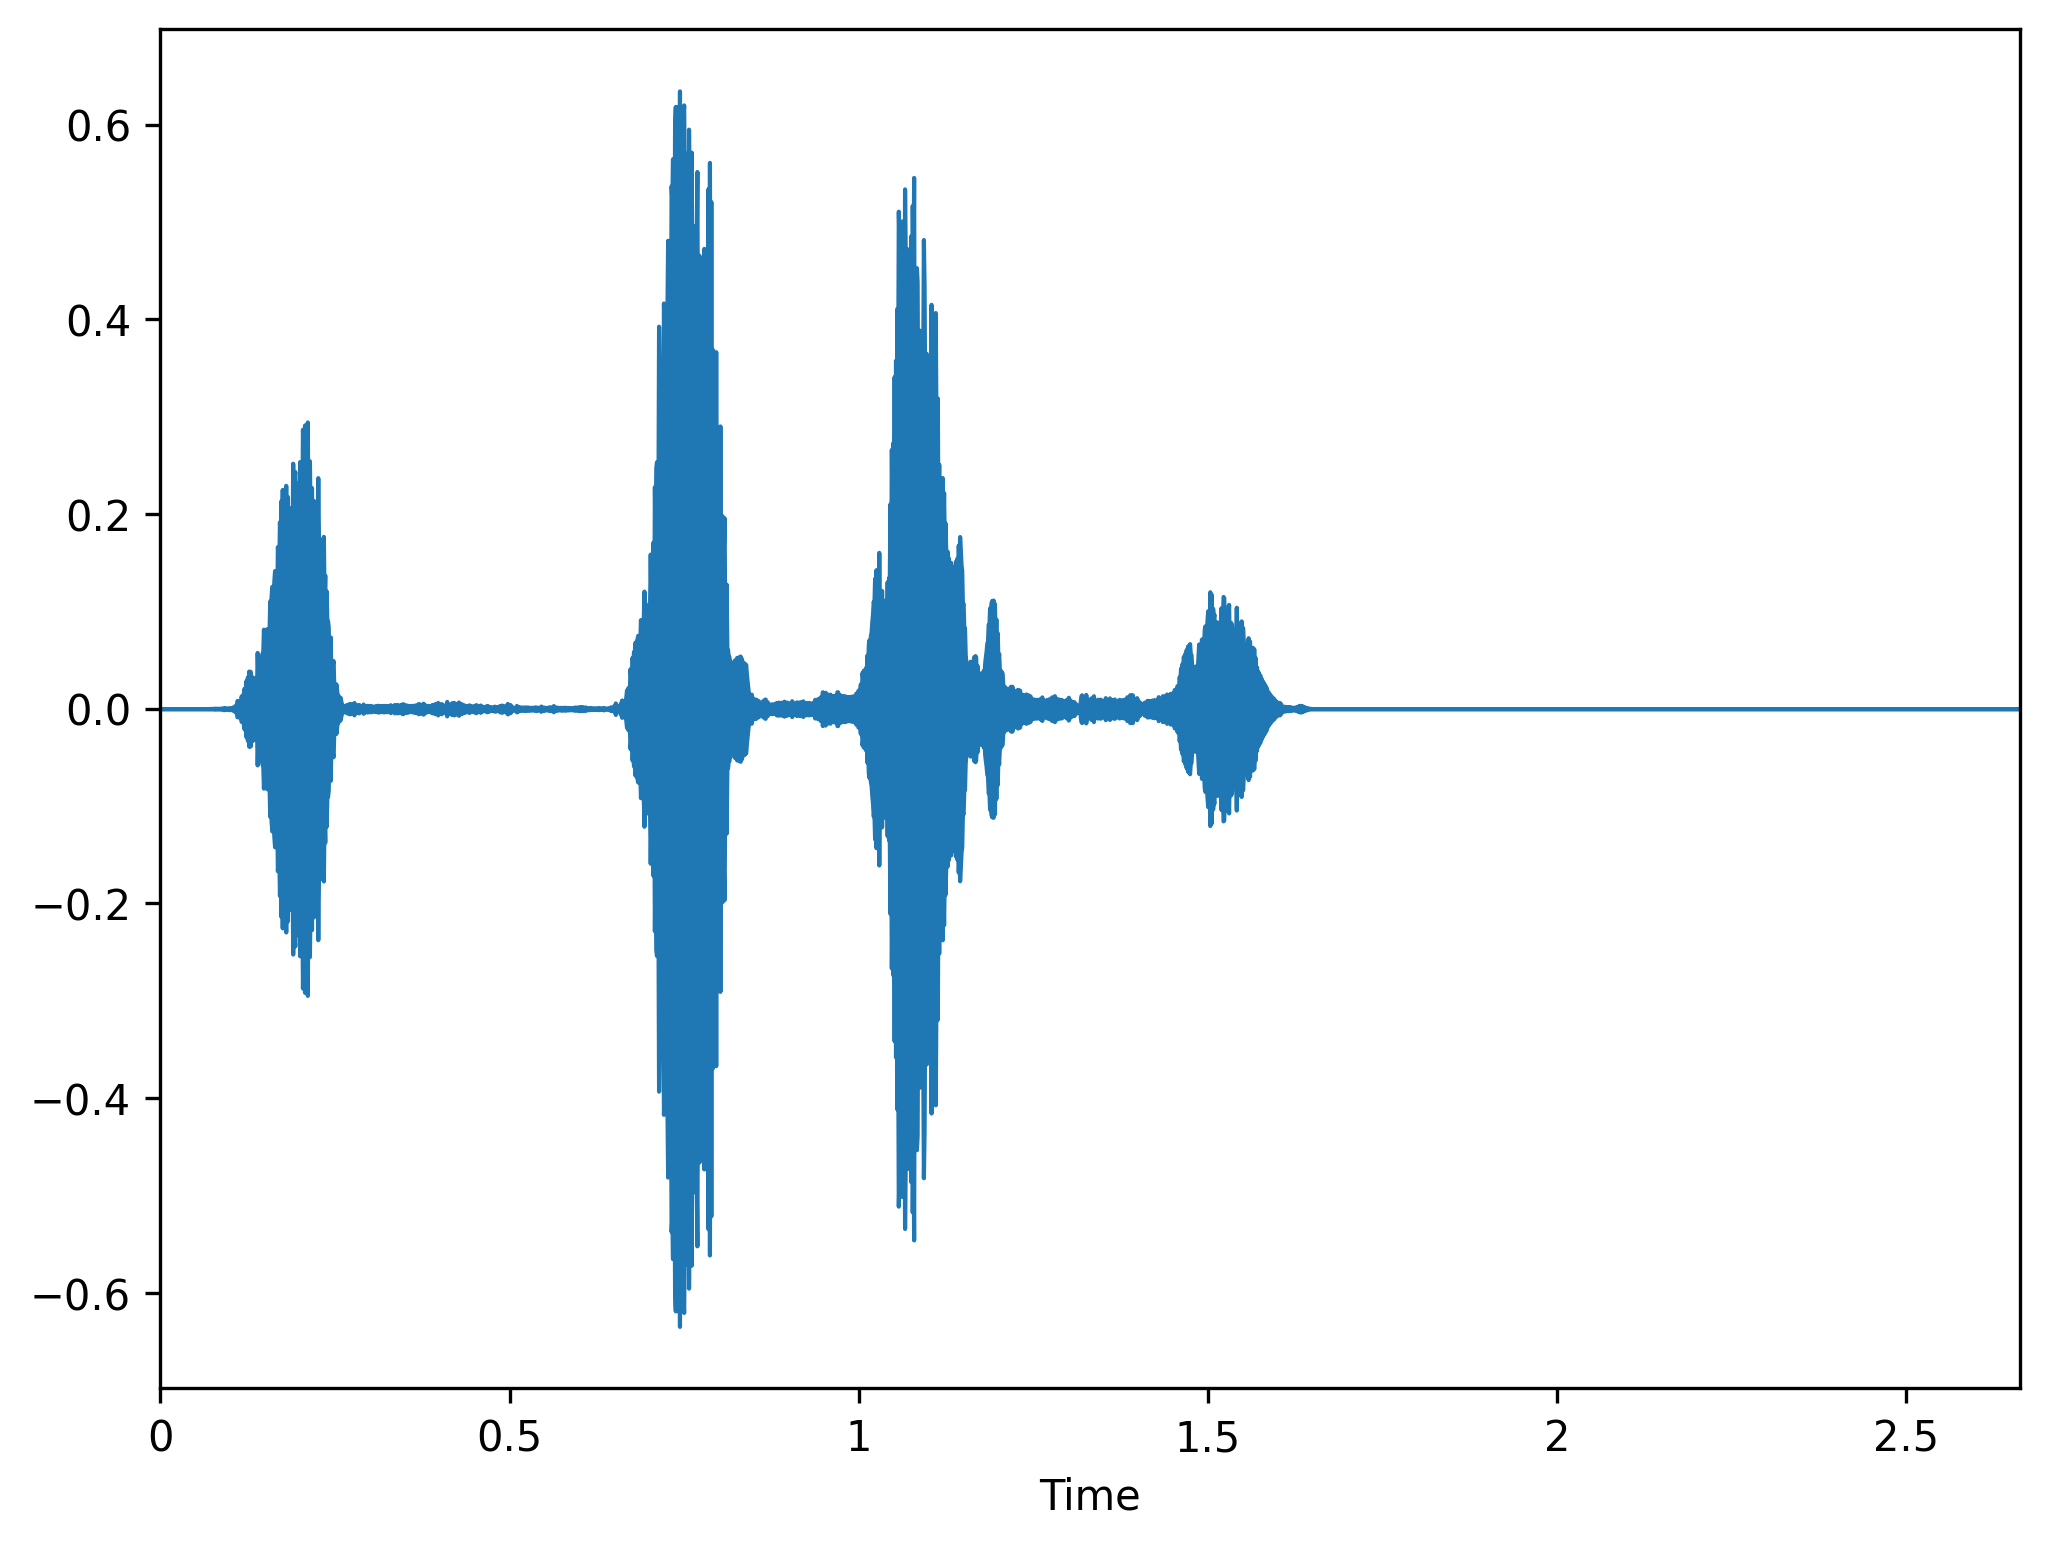

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('/content/dog_barking-6296.mp3')
plt.figure()
figure, axes = plt.subplots(1, 1)
figure.set_size_inches(8, 6)
figure.set_dpi(300)
librosa.display.waveplot(y, sr=sr)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


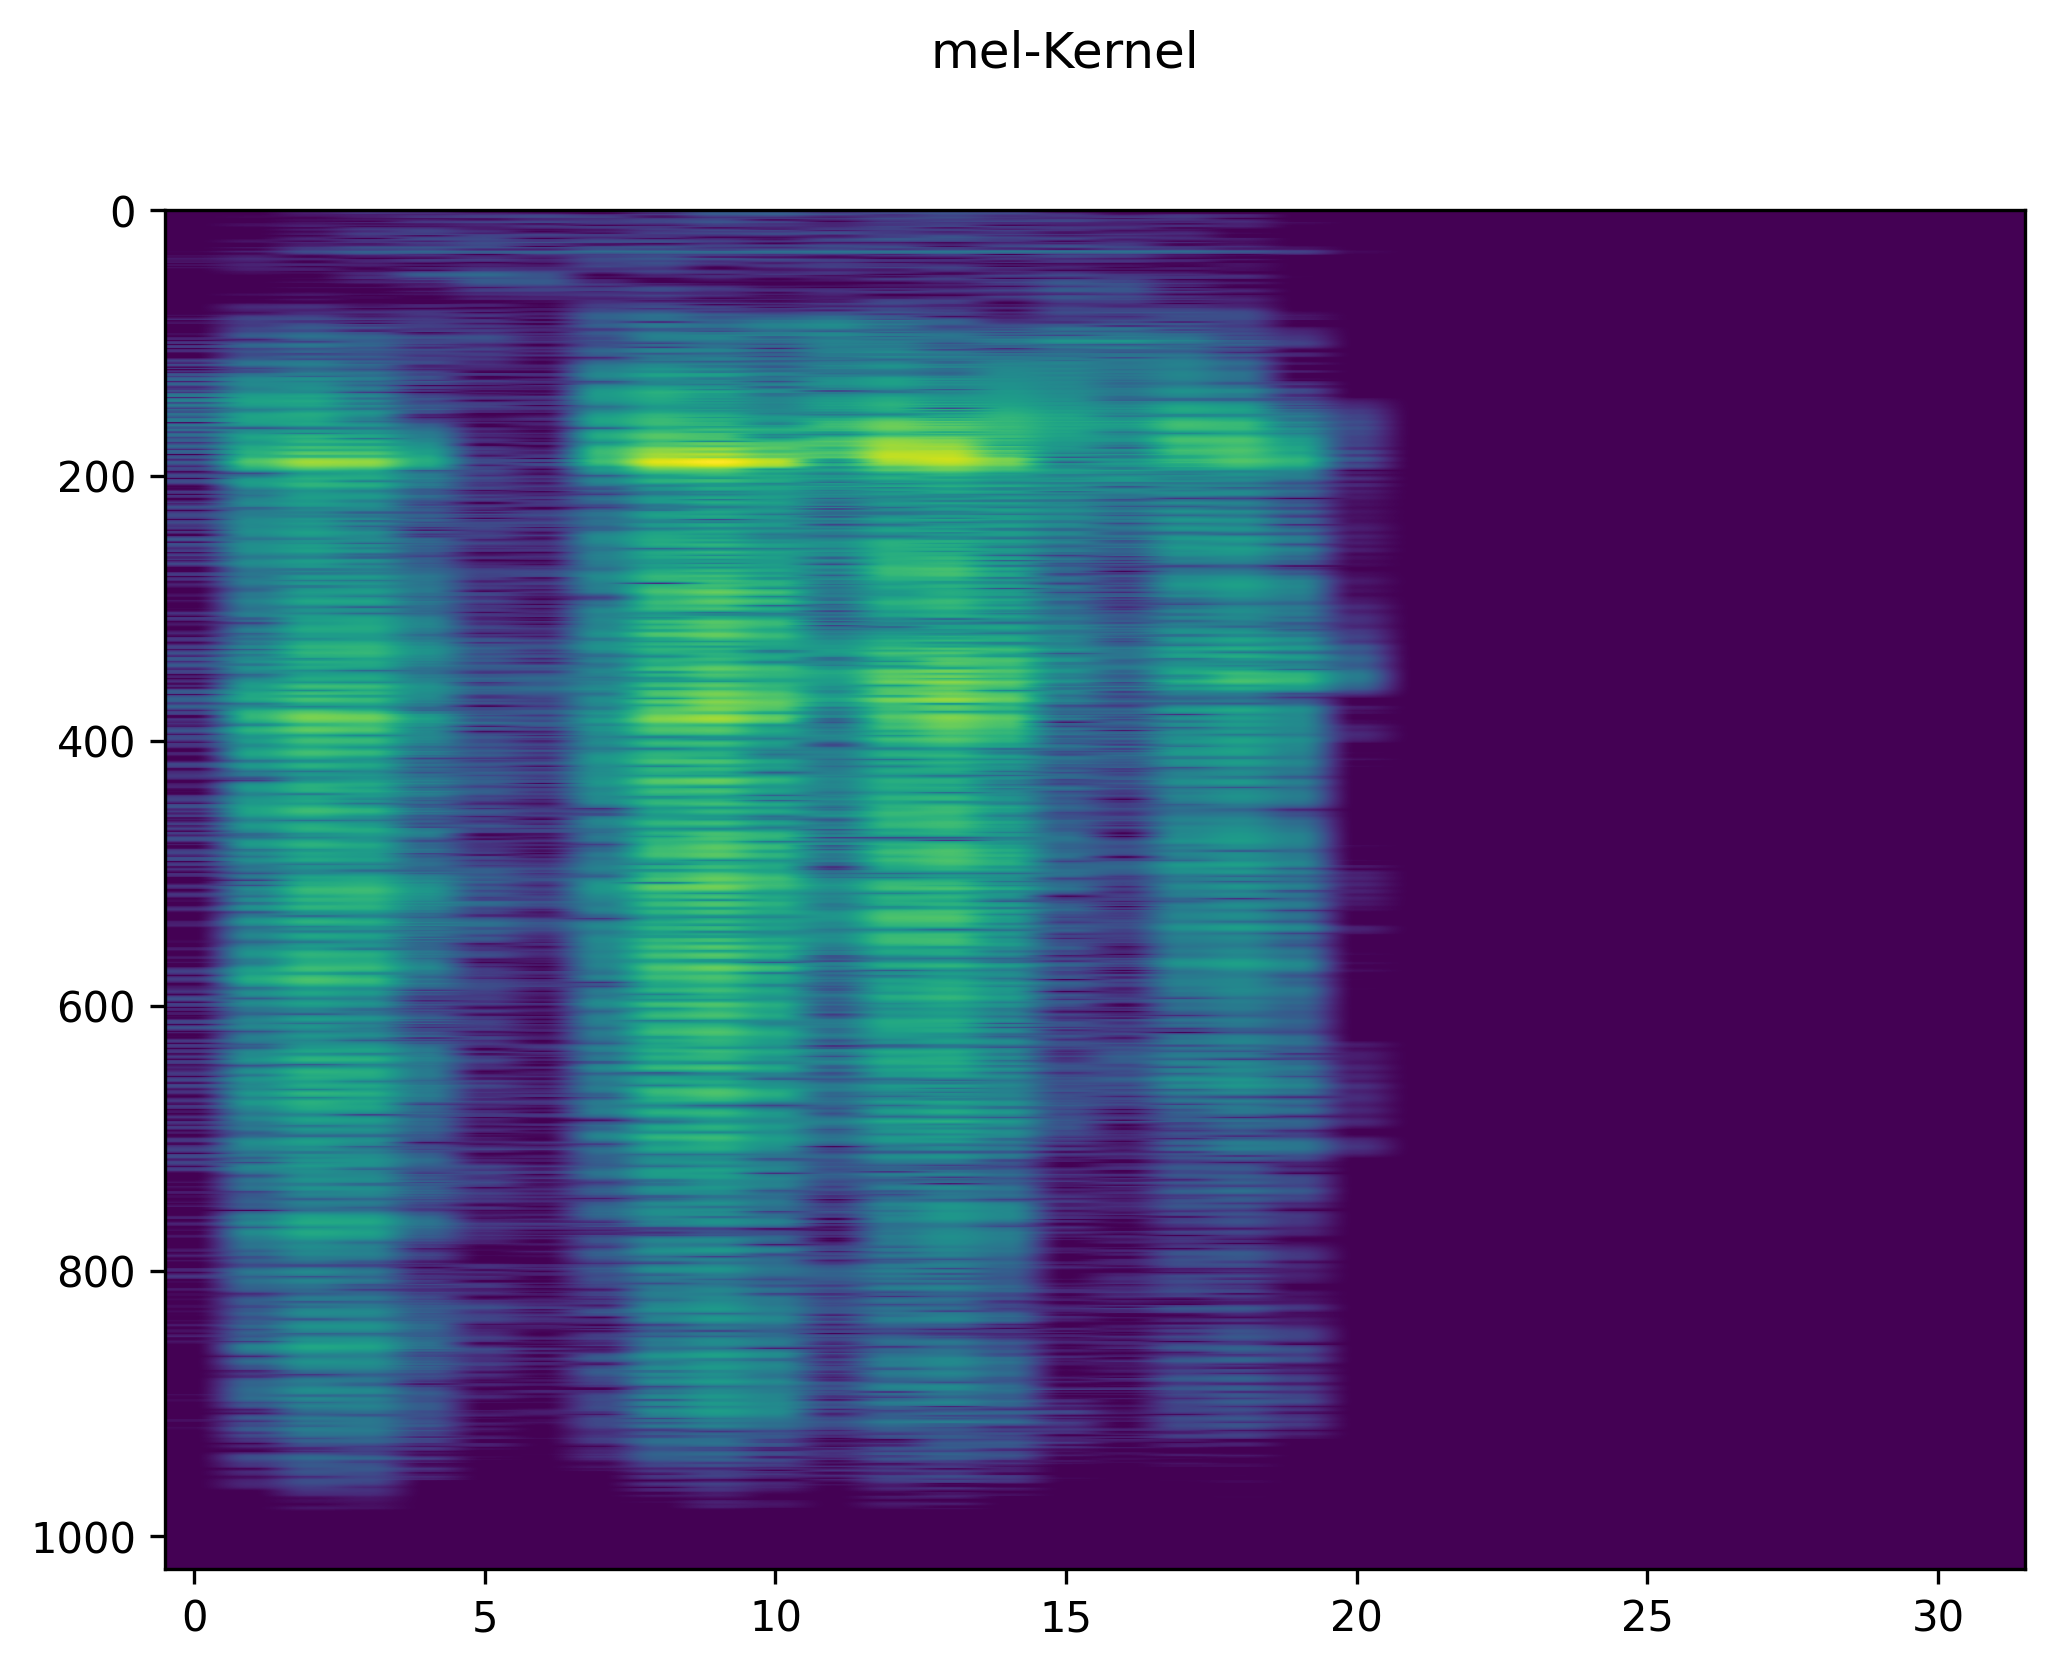

In [ ]:
import librosa.core.spectrum

import matplotlib.pyplot as plt
import torch
from torchaudio.transforms import Spectrogram

n_fft = 2048
win_len = None
hop_len = 512
sample_rate = 6000

path = '/content/dog_barking-6296.mp3'

waveform, _ = librosa.load(path, sr=sample_rate)
waveform = torch.Tensor(waveform)

torchaudio_spec = Spectrogram(
    n_fft=n_fft,
    win_length=win_len,
    hop_length=hop_len,
    center=True,
    pad_mode="reflect",
    power=2.0,
)(waveform)

fig, axs = plt.subplots(1, 1)
fig.set_size_inches(8, 6)
fig.set_dpi(300)
fig.suptitle('mel-Kernel')

#axs[0].set_title('torchaudio')
#axs[0].set_ylabel('mel bin')
#axs[0].set_xlabel('frame')
axs.imshow(librosa.power_to_db(torchaudio_spec), aspect='auto')

plt.show()

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


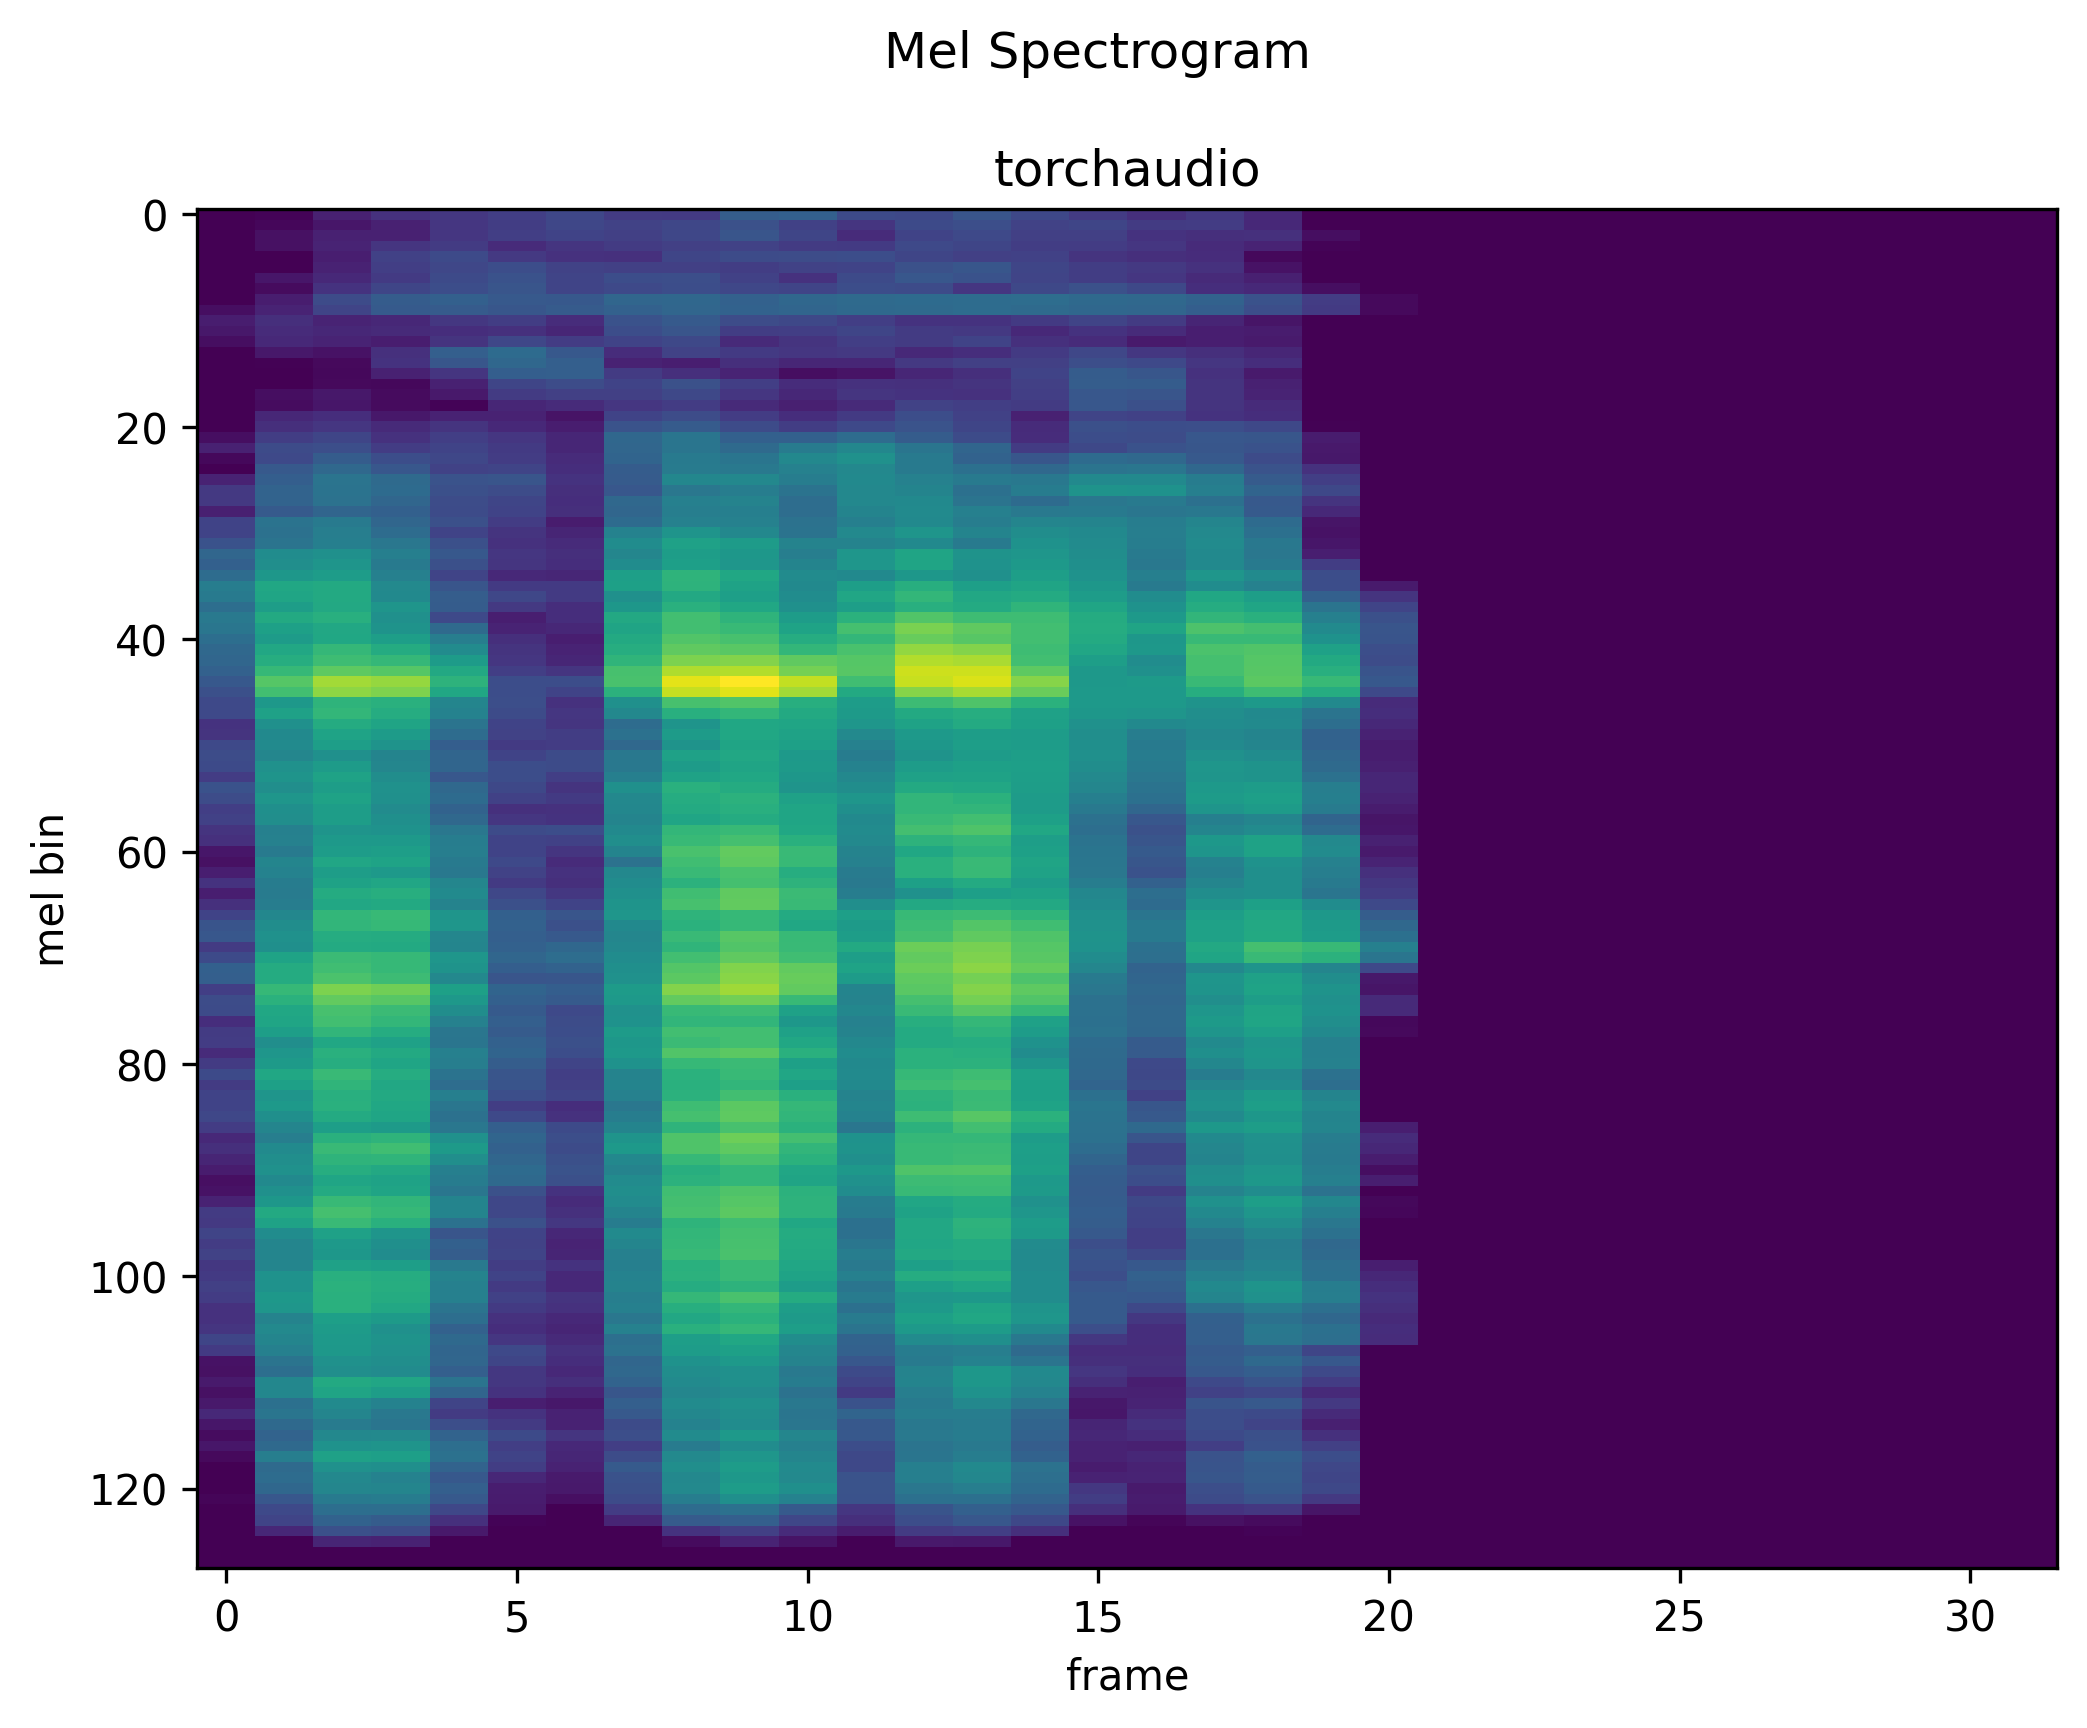

In [ ]:
import librosa

import matplotlib.pyplot as plt
import torch
from torchaudio.transforms import MelSpectrogram

n_fft = 2048
win_len = None
hop_len = 512
n_mels = 128
sample_rate = 6000

path = '/content/dog_barking-6296.mp3'

waveform, sample_rate = librosa.load(path, sr=sample_rate)
waveform = torch.Tensor(waveform)

torchaudio_melspec = MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_len,
    hop_length=hop_len,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm='slaney',
    onesided=True,
    n_mels=n_mels,
)(waveform)

fig, axs = plt.subplots(1, 1)
fig.set_size_inches(8, 6)
fig.set_dpi(300)
fig.suptitle('Mel Spectrogram')

axs.set_title('torchaudio')
axs.set_ylabel('mel bin')
axs.set_xlabel('frame')
axs.imshow(librosa.power_to_db(torchaudio_melspec), aspect='auto')

plt.show()

# 2.3

In [ ]:
import torchaudio
import torchaudio.transforms as T
import torch
import matplotlib.pyplot as plt

In [ ]:
def plot_waveform(waveform, sr, title=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    if title:
      figure.suptitle(title)
    figure.set_size_inches(8, 6)
    figure.set_dpi(300)
    plt.xlabel('Tiempo (s)')
    #plt.ylabel('xlabel')
    plt.show(block=False)

def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or "Spectrogram (db)")
  axs.set_ylabel(ylabel)
  axs.set_xlabel("frame")
  im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
  fig.colorbar(im, ax=axs)
  plt.show(block=False)

In [ ]:
%cd "/content/drive/Othercomputers/Mi portátil/projecte/StutterFormer/src"

/content/drive/Othercomputers/Mi portátil/projecte/StutterFormer/src


In [ ]:
STUTTER = '../data/LibriStutter/LibriStutter Audio/289/121665/289-121665-0033.flac'
SPEECH = '../data/LibriSpeech/289/121665/289-121665-0033.flac'
stutter_waveform, stutter_sr = torchaudio.load(STUTTER)
speech_waveform, speech_sr = torchaudio.load(SPEECH)

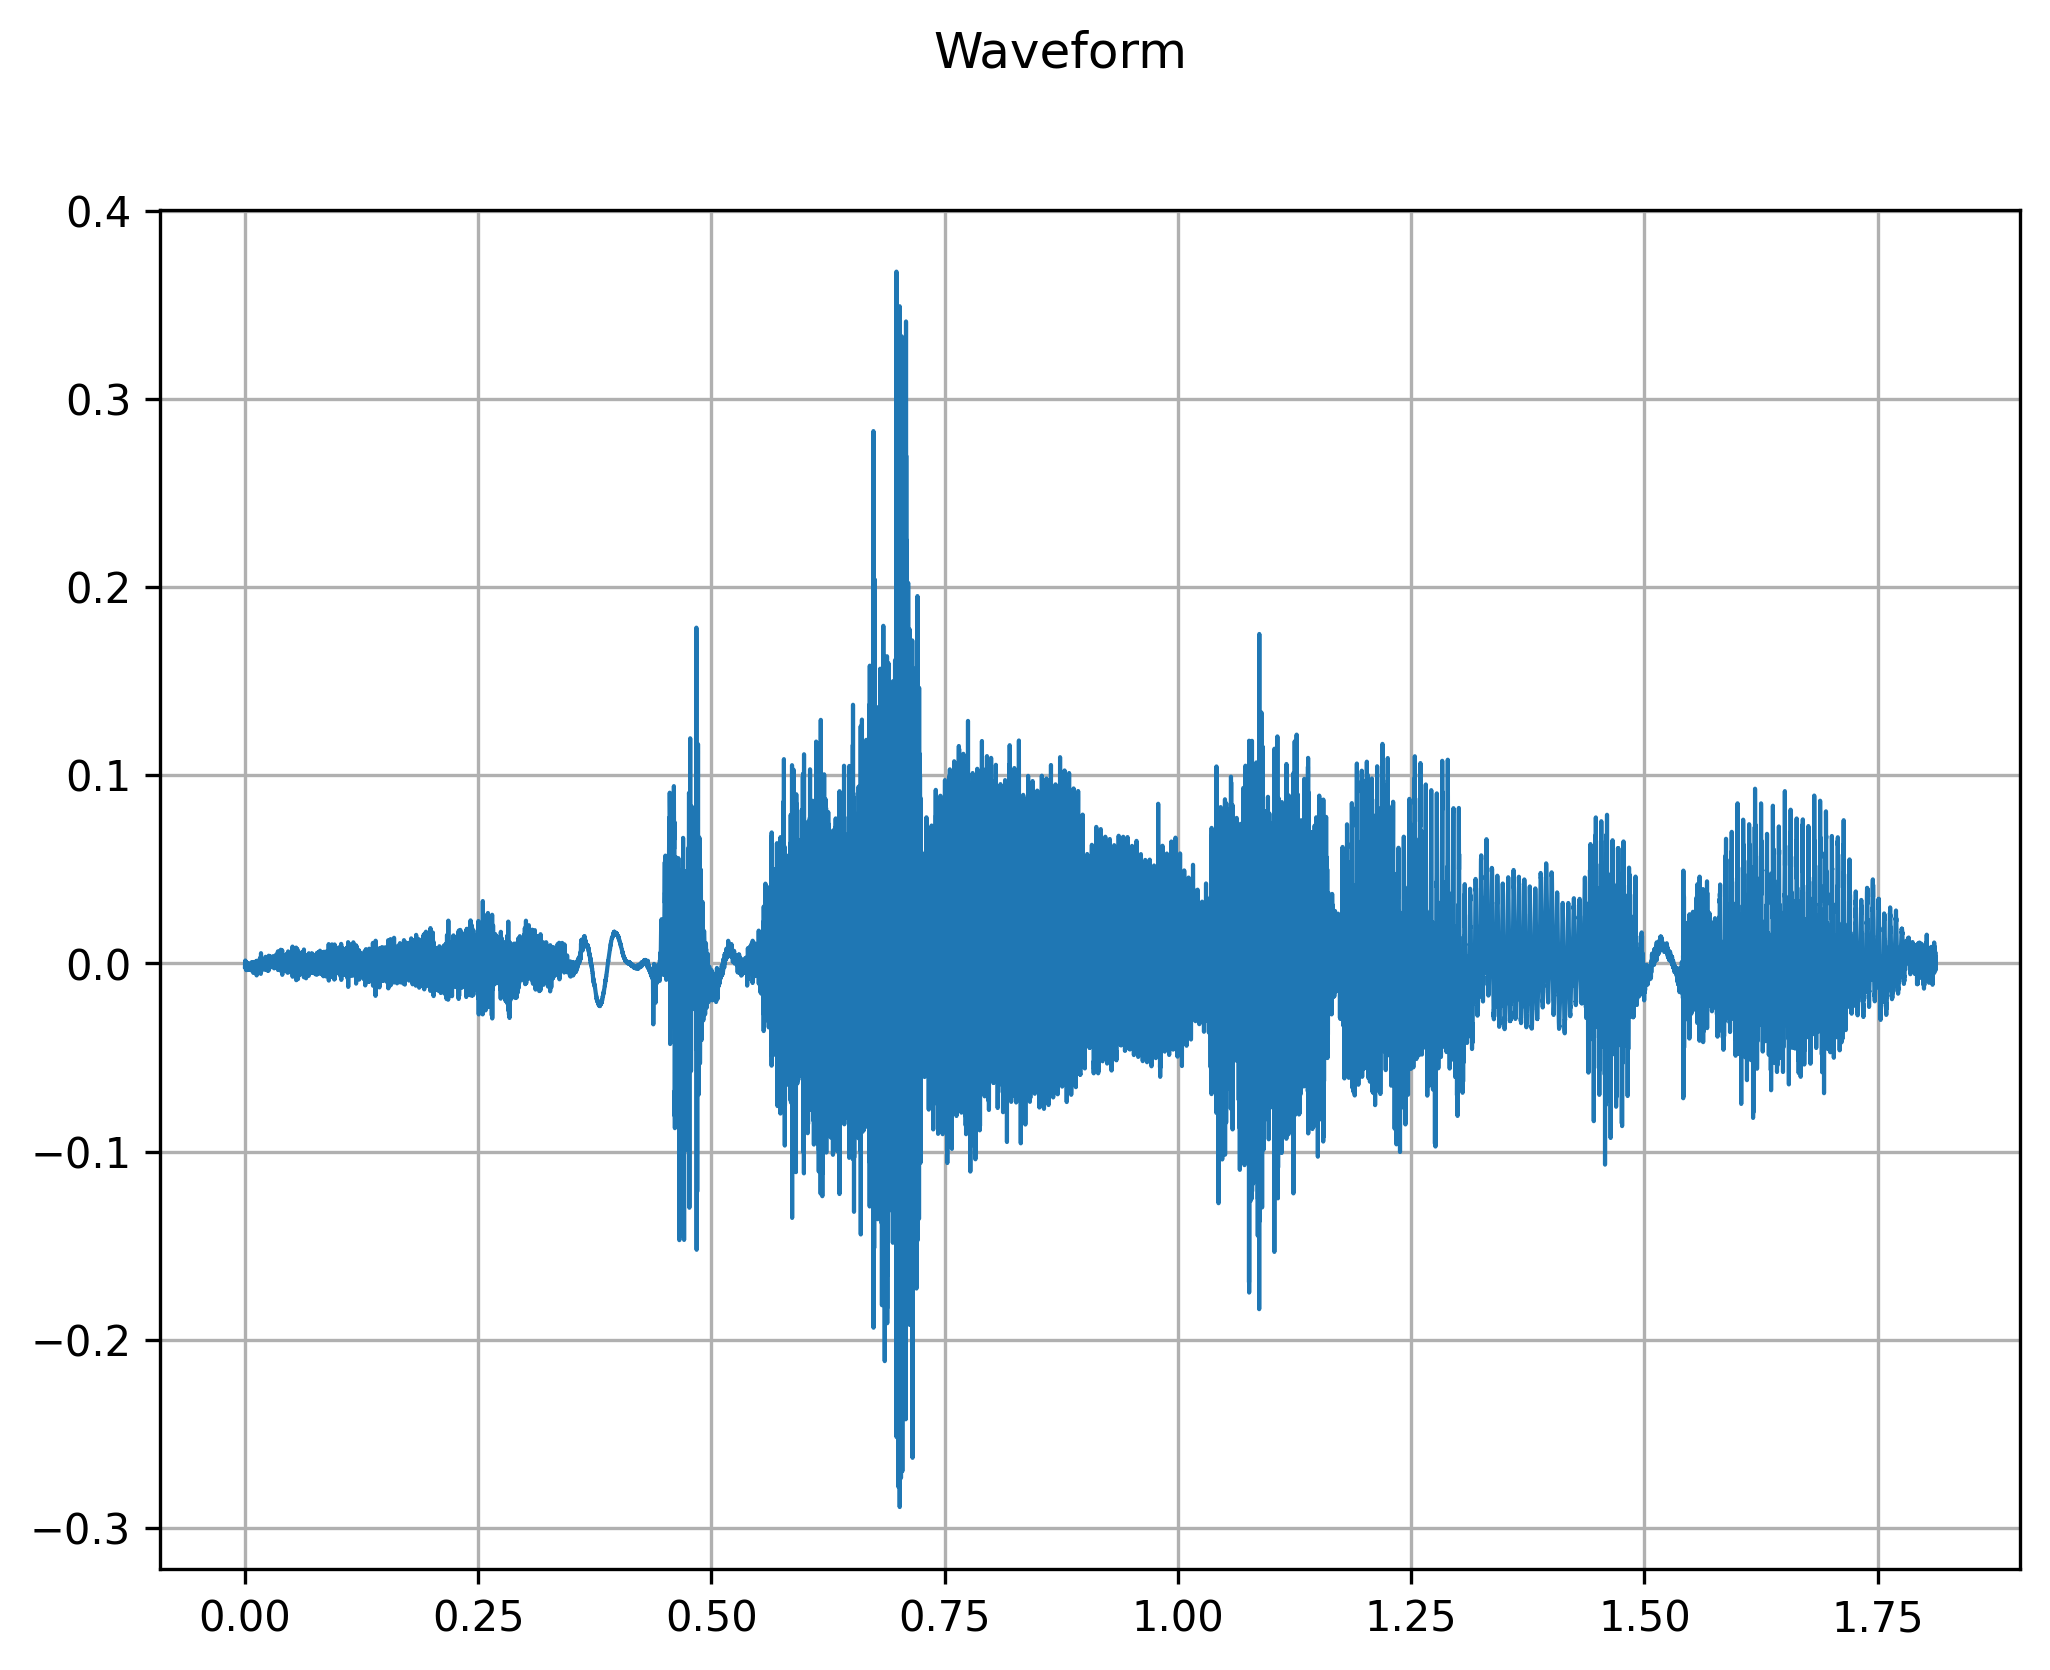

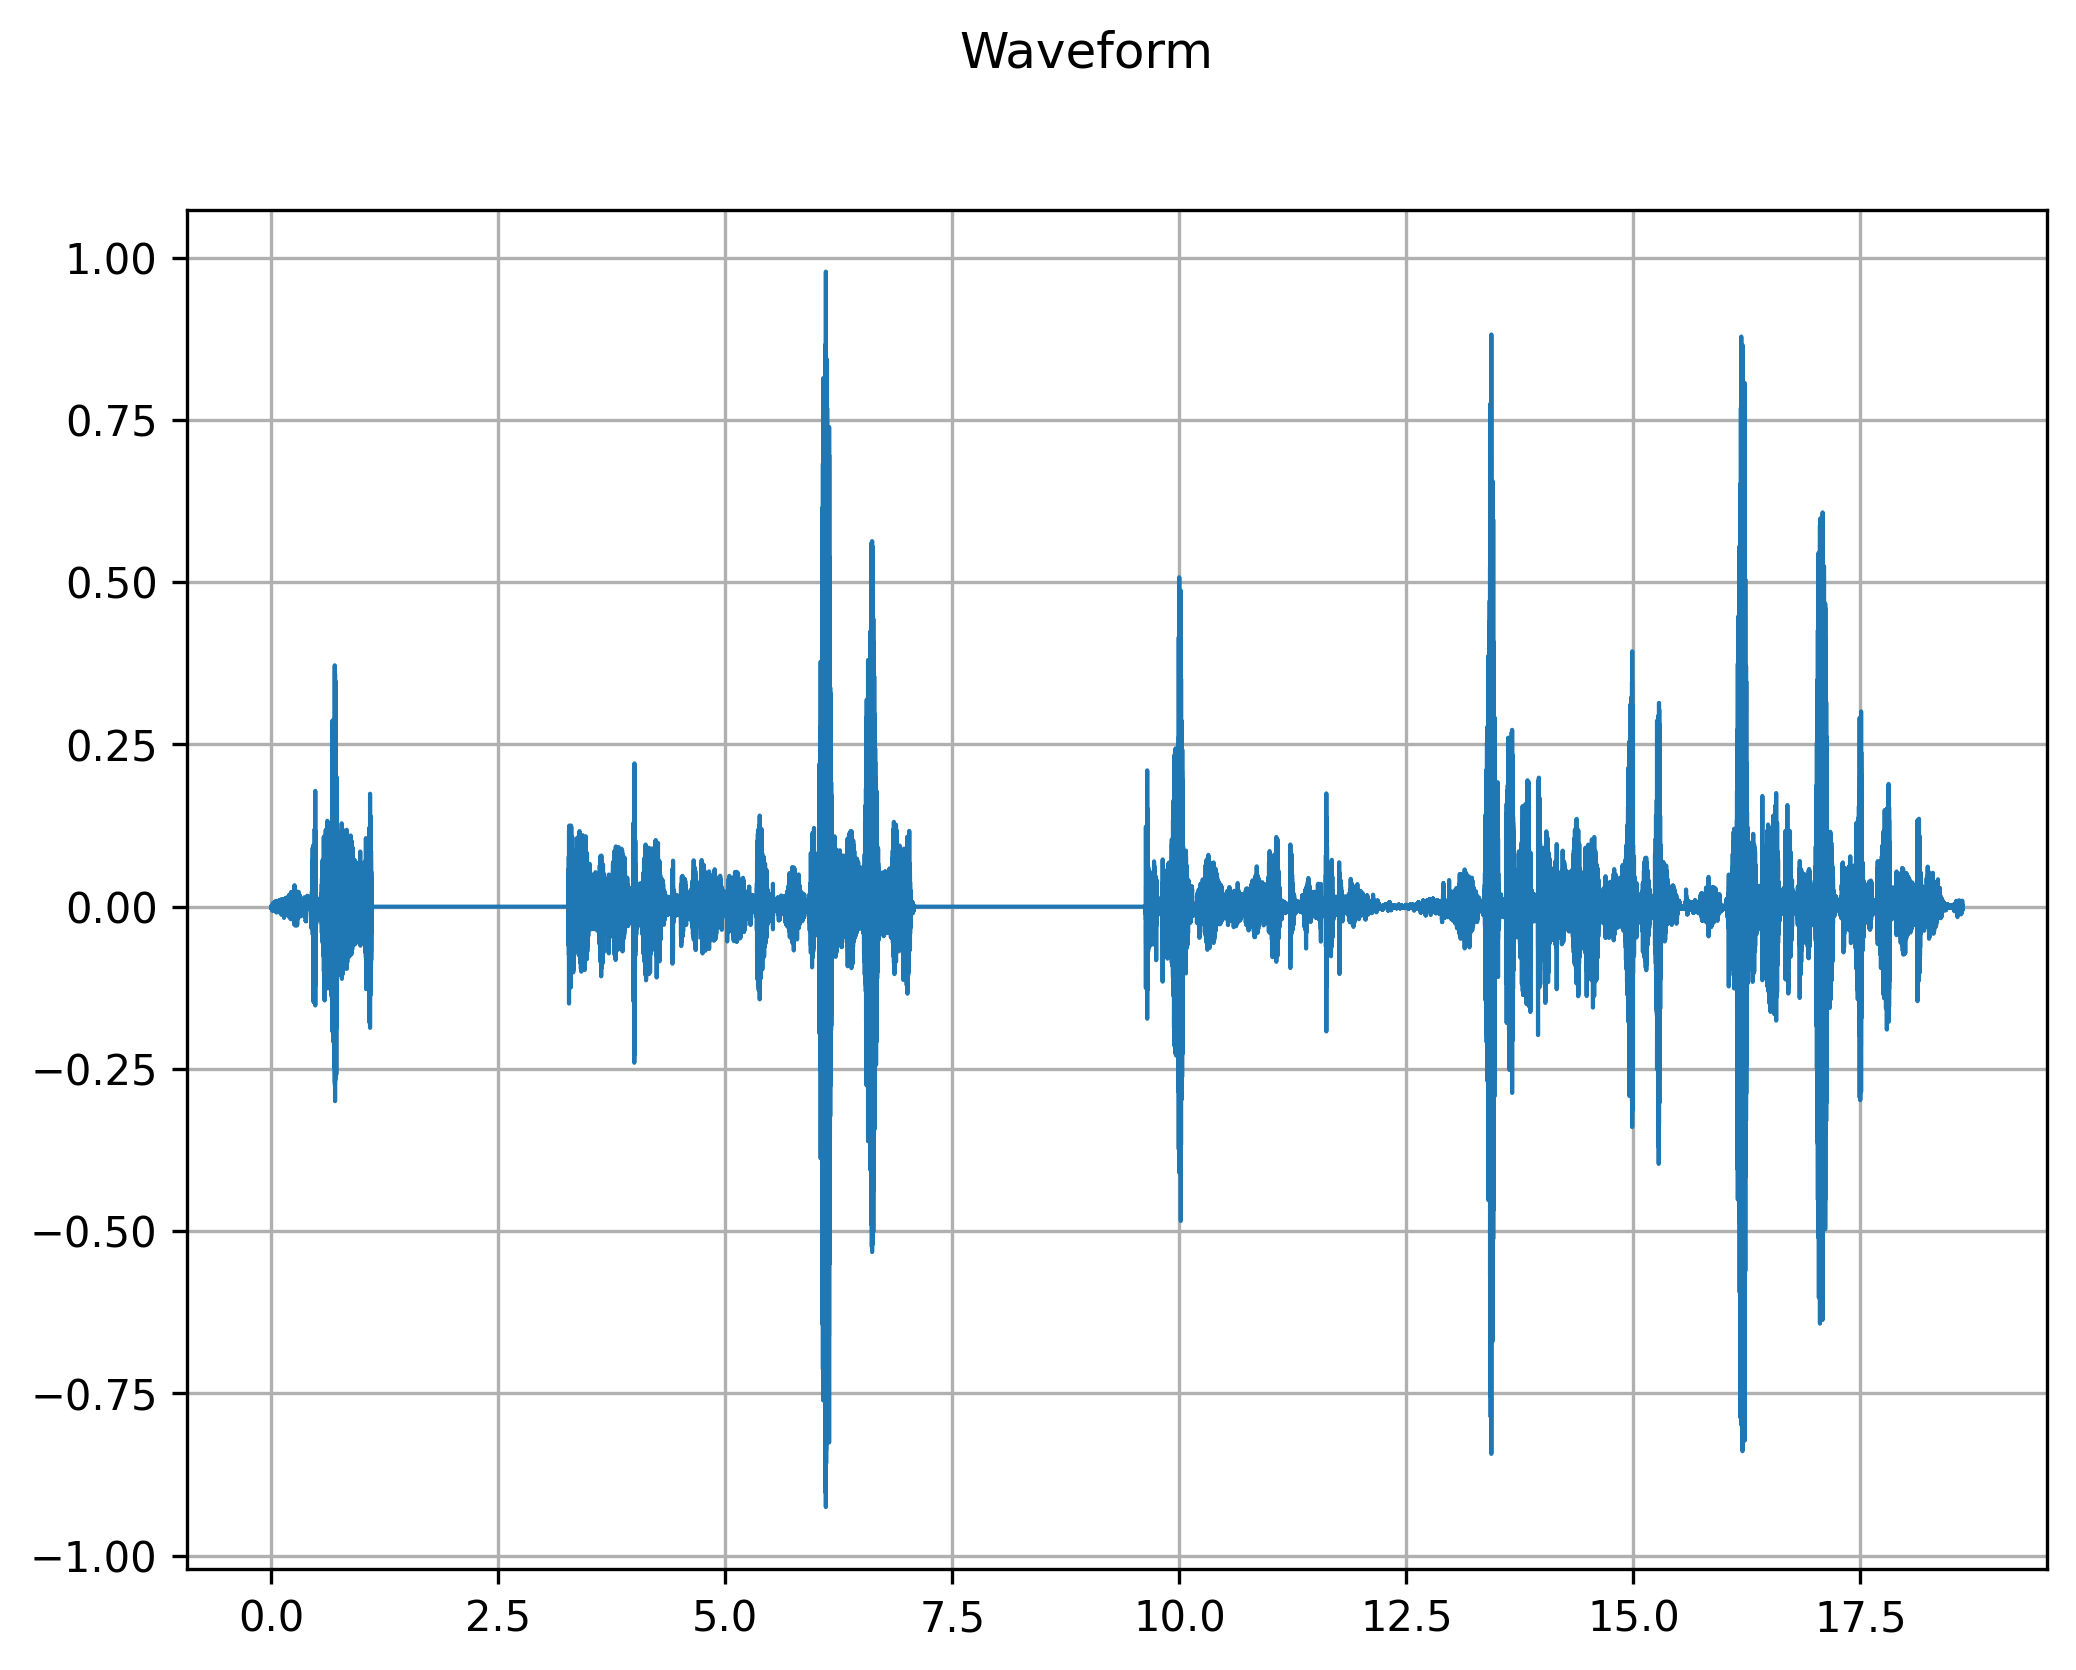

In [ ]:
plot_waveform(stutter_waveform[:, : 29000], stutter_sr)
plot_waveform(speech_waveform, speech_sr)

In [ ]:
n_fft = 1024
win_length = None
hop_length = 512

# Define transform
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)

stutter_spec = spectrogram(stutter_waveform)
plot_spectrogram(stutter_spec[0], title="Stutter")

speech_spec = spectrogram(speech_waveform)
plot_spectrogram(speech_spec[0], title="Speech")

In [ ]:
import librosa
signal, sr = librosa.load(STUTTER)

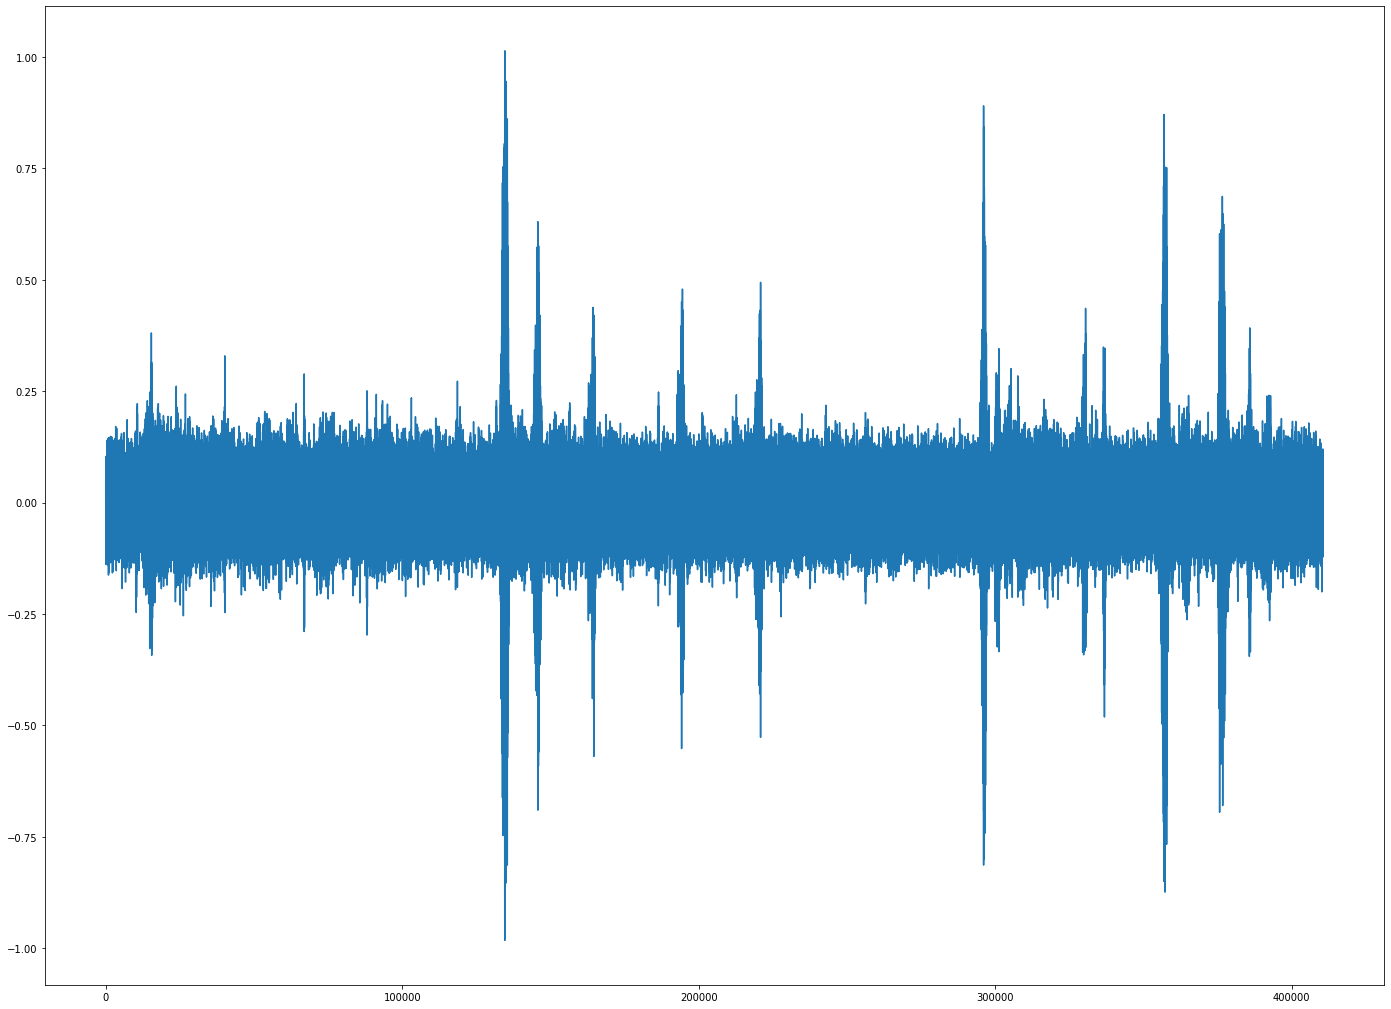

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

RMS=math.sqrt(np.mean(signal**2))
noise=np.random.normal(0, RMS, signal.shape[0])

plt.figure(figsize=(24, 18))
plt.plot(signal + noise)

# 7.2

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

In [2]:
%cd "/content/drive/Othercomputers/Mi portátil/projecte/StutterFormer/out/tiny-stutterformer/2345"

/content/drive/Othercomputers/Mi portátil/projecte/StutterFormer/out/tiny-stutterformer/2345


In [3]:
metrics = pd.read_csv("metrics.csv")

In [ ]:
metrics.head()

,epoch,lr,train_loss,valid_loss,valid_pesq,valid_stoi
0,1,0.00015,7.30,4.78,1.17,0.0
1,2,0.00015,5.27,3.73,1.28,0.0
2,3,0.00015,4.56,2.79,1.37,0.0
3,4,0.00015,4.25,3.24,1.34,0.0
4,5,0.00015,4.06,2.66,1.40,0.0


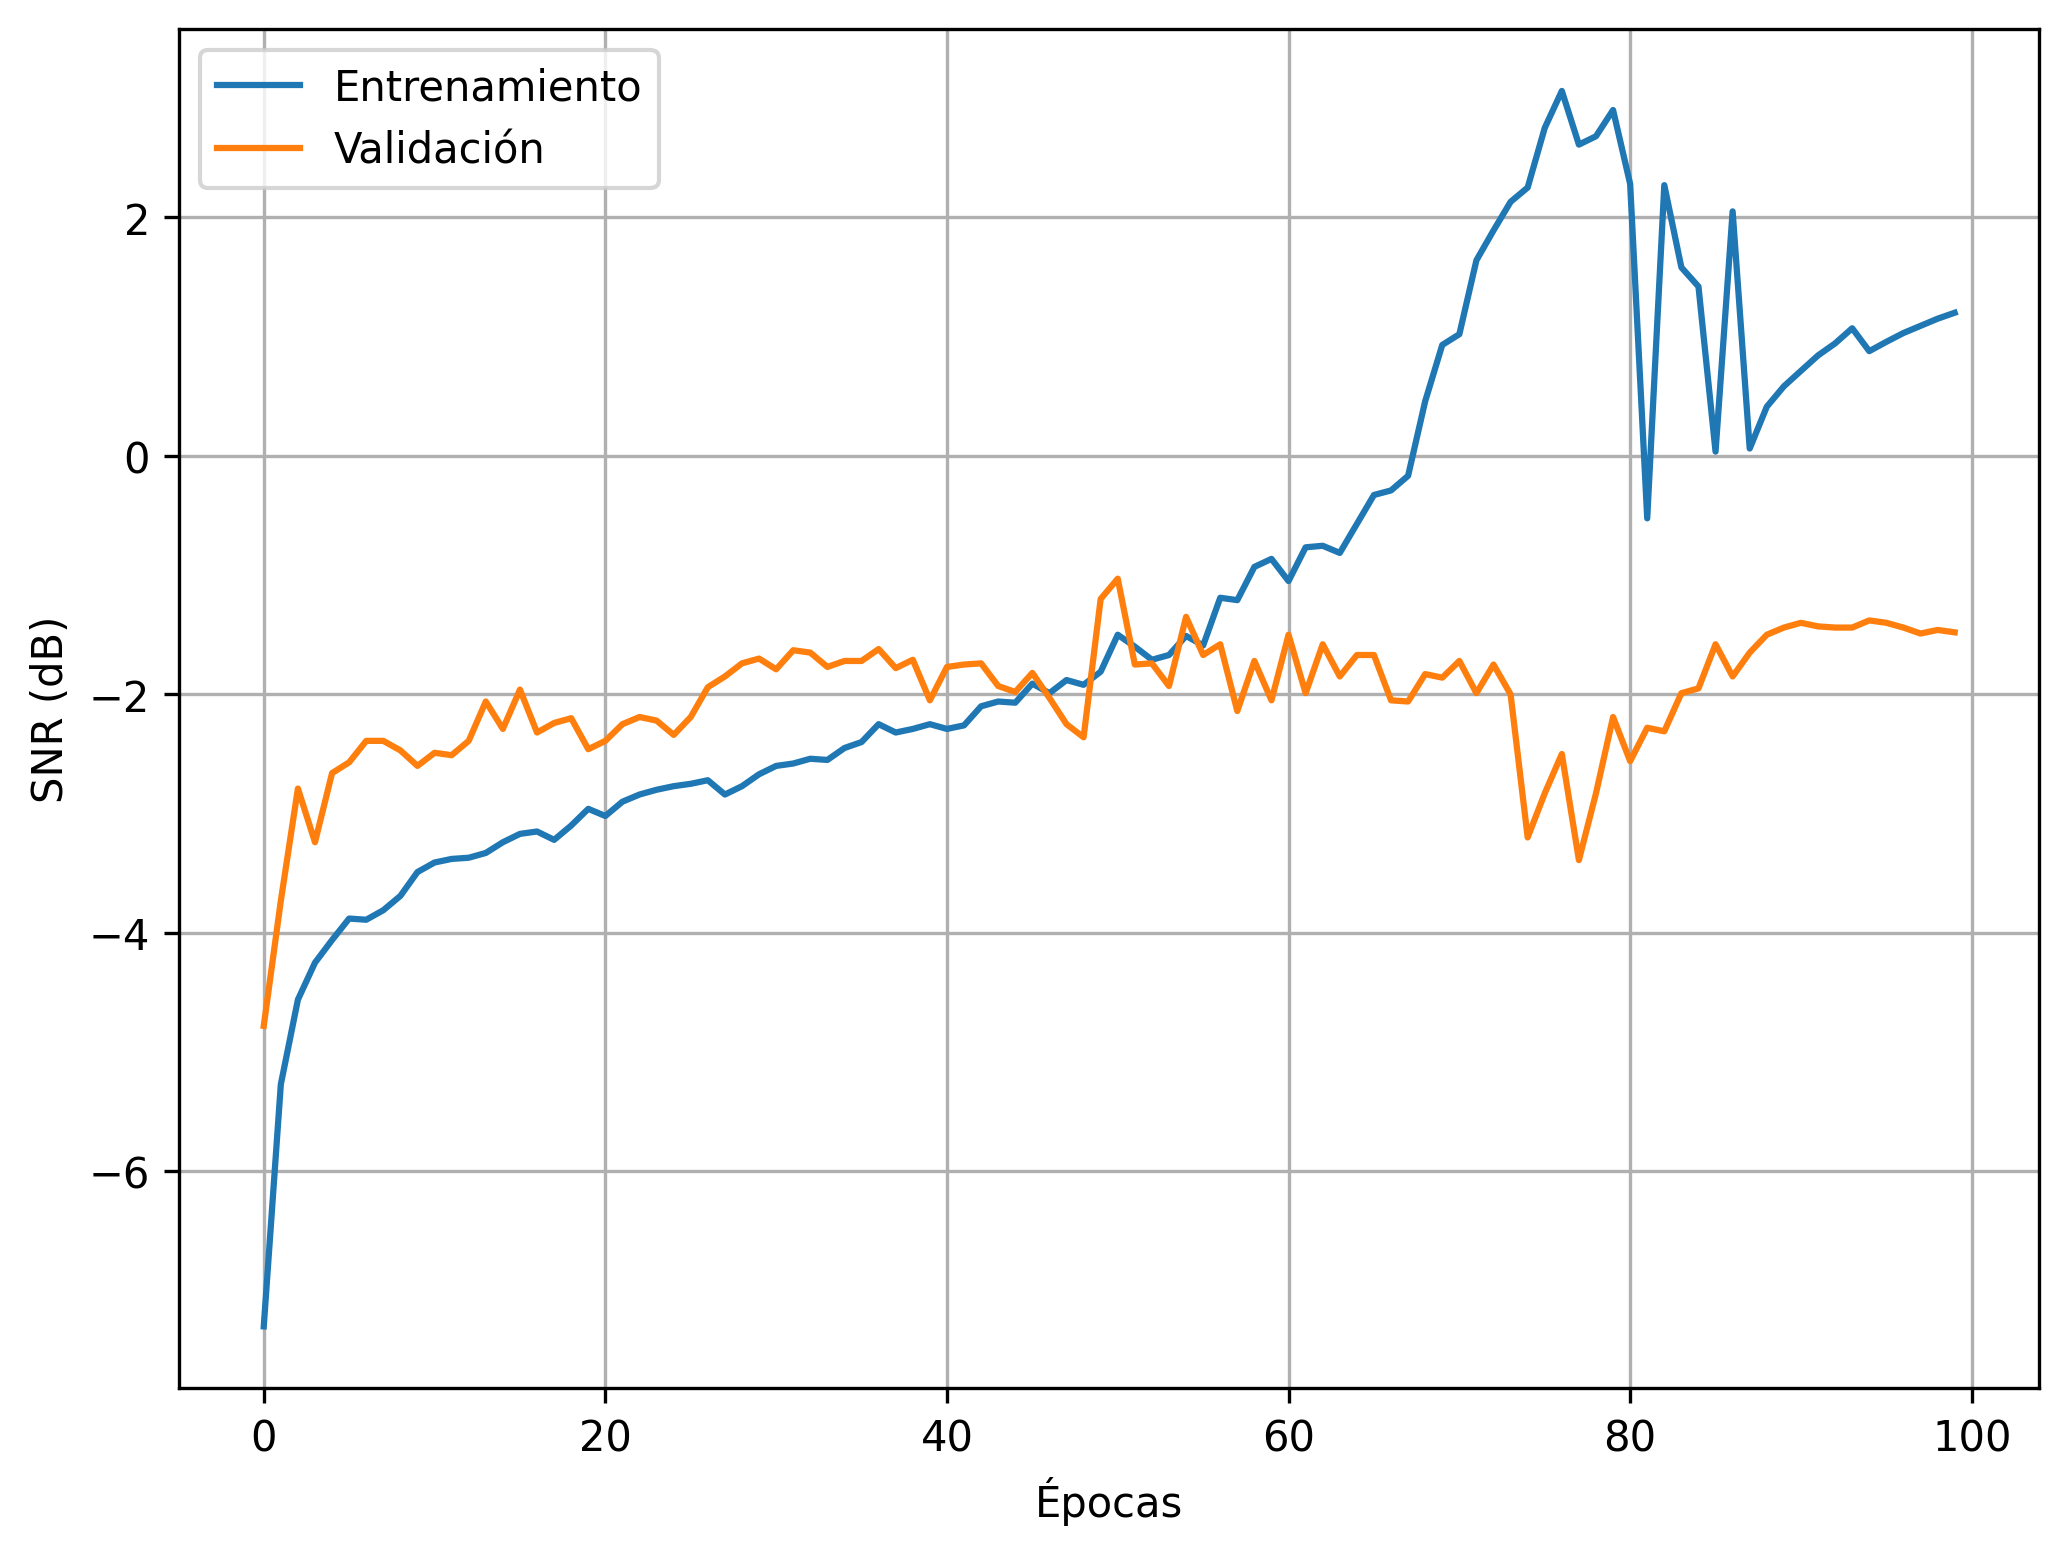

In [17]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
f.set_dpi(300)

plt.plot(-metrics["train_loss"], label="Entrenamiento")
plt.plot(-metrics["valid_loss"], label="Validación")
plt.legend(loc="upper left")
plt.xlabel("Épocas")
plt.ylabel("SNR (dB)")
plt.grid()

plt.show()

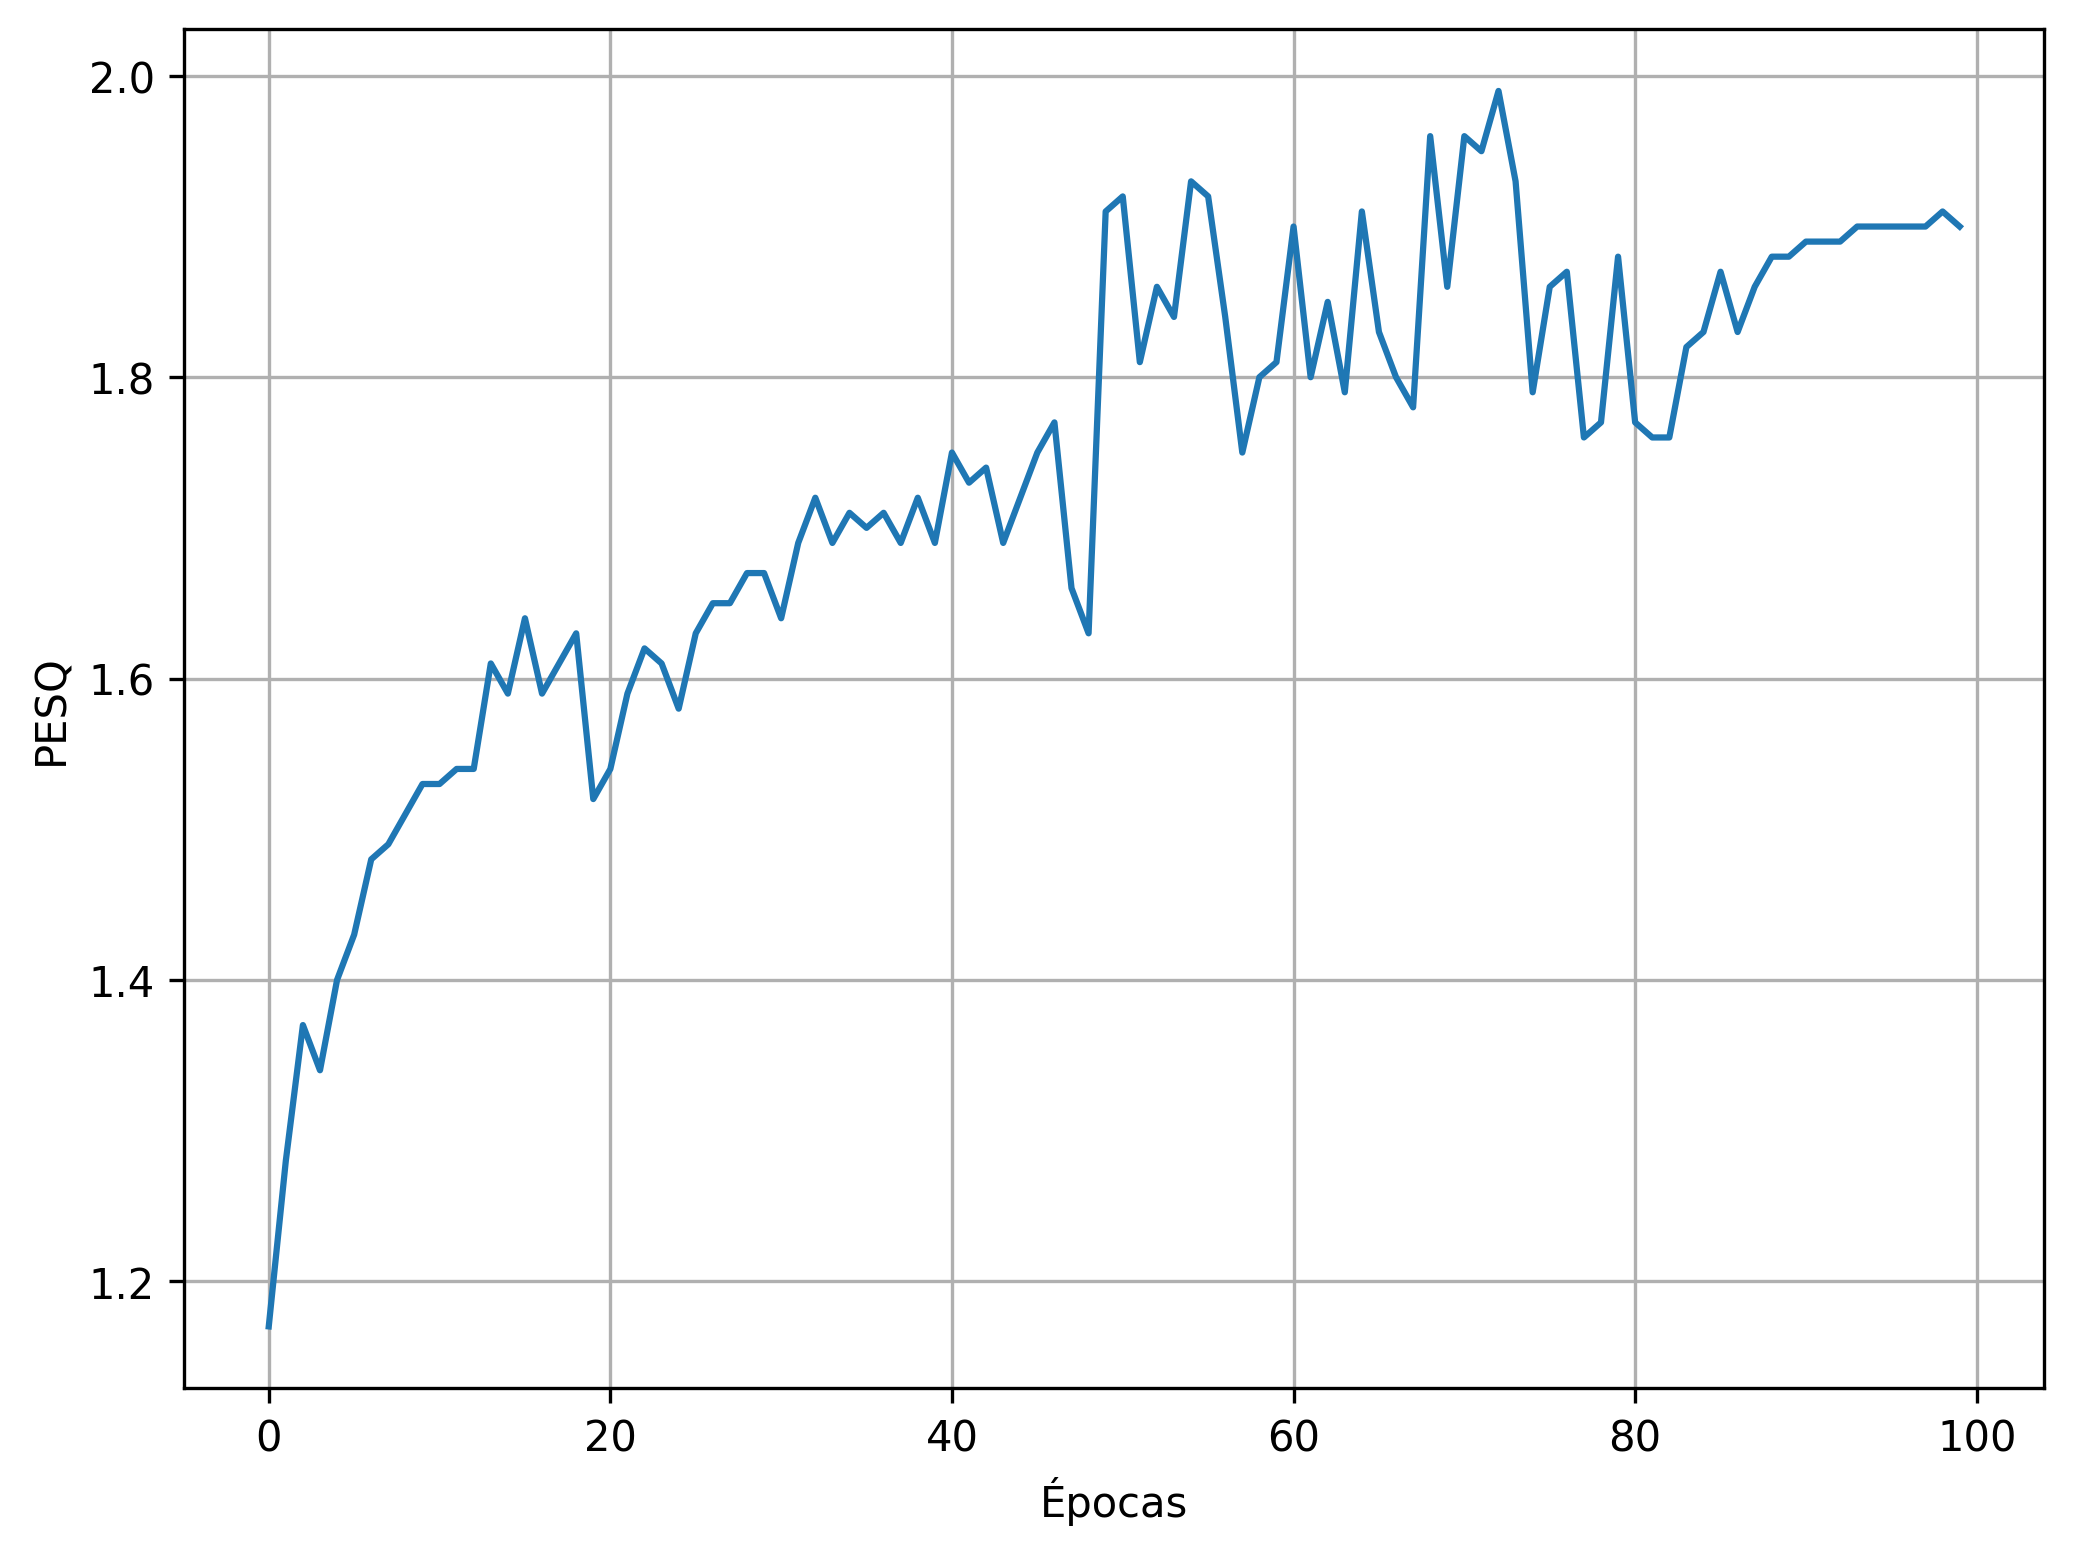

In [20]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
f.set_dpi(300)

plt.plot(metrics["valid_pesq"])
plt.legend().set_visible(False)
plt.xlabel("Épocas")
plt.ylabel("PESQ")
plt.grid()

plt.show()